In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Load CSV file into a DataFrame
df = pd.read_csv('SA_1P_testingData1.csv')

# Display the DataFrame
df

,Test_ID,numGames,numParlays,runtime,temp_threshold,SA_Correctness,SA_Offset
0,0,4,9,0.0039,1.501,0.93000,8
1,1,5,8,0.0578,0.105,0.99998,2
2,2,5,10,0.0340,0.205,0.99997,7
3,3,4,9,0.0337,0.227,0.99993,8
4,4,2,7,0.0407,0.130,1.00000,0
...,...,...,...,...,...,...,...
1195,1195,5,6,0.0037,1.311,1.00000,0
1196,1196,2,4,0.0025,1.320,0.99804,4
1197,1197,1,2,0.0032,0.745,1.00000,0
1198,1198,2,2,0.0025,1.108,0.97120,2


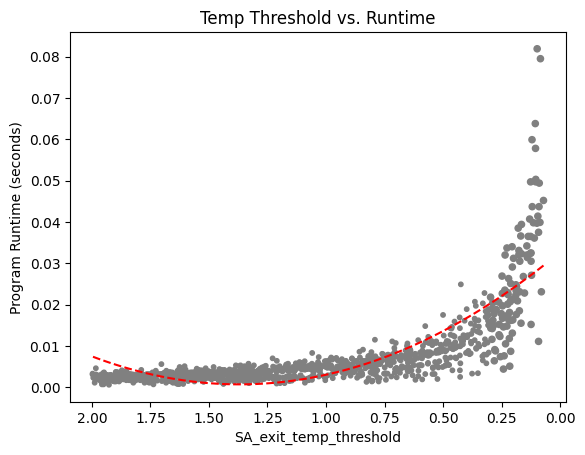

In [25]:
# Select columns to plot
x = df['temp_threshold']
y = df['runtime']

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['runtime'], s=counts['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()

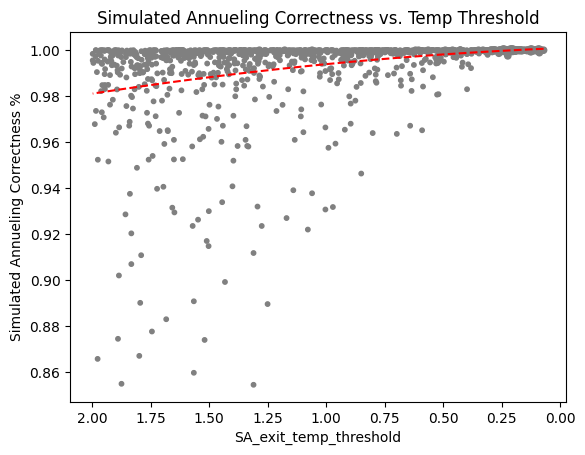

In [27]:
#exclude outliers
df = df[df['SA_Correctness'] >= 0.85]

# Select columns to plot
x = df['temp_threshold']
y = df['SA_Correctness']

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'SA_Correctness']).size().reset_index(name='count')

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['SA_Correctness'], s=counts['count']*10, label='thresh_v_Correct', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Simulated Annueling Correctness %')
plt.title('Simulated Annueling Correctness vs. Temp Threshold')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()

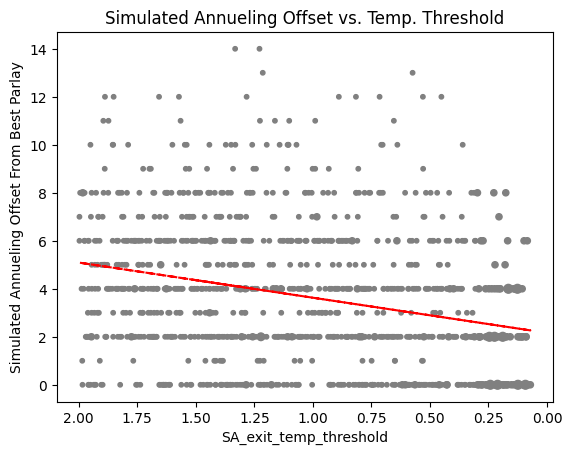

In [32]:
# Select columns to plot
x = df['temp_threshold']
y = df['SA_Offset']

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'SA_Offset']).size().reset_index(name='count')

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['SA_Offset'], s=counts['count']*10, label='thresh_v_Offset', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Simulated Annueling Offset From Best Parlay')
plt.title('Simulated Annueling Offset vs. Temp. Threshold')

# Add line of best fit
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()

In [59]:
 
# Select columns to plot
x_column = df['temp_threshold']
y_column = df['SA_Offset']

# Set the bin size for the x axis
bins = np.arange(0,2.5,0.1)
bin_size = 0.1

# Create a new DataFrame with the averages
averages_df = df.groupby(pd.cut(x_column, bins=bins)).mean().reset_index(drop=True)

# Create the bar chart
#plt.bar(averages_df[x_column], averages_df[y_column], width=bin_size)

# Add axis labels and title
# plt.xlabel(x_column)
# plt.ylabel('Average ' + y_column)
# plt.title('Average ' + y_column + ' vs. ' + x_column)

# Show the graph
#plt.show()

averages_df


KeyError: "None of [Index([1.501, 0.105, 0.205, 0.227,  0.13, 0.213, 0.246, 0.222, 0.216,  0.12,\n       ...\n        0.92, 1.287, 1.388, 1.773,  0.66, 1.311,  1.32, 0.745, 1.108, 1.291],\n      dtype='float64', length=1188)] are in the [columns]"